<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [28]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



Text(0.5, 0.98, 'Grafico de dispersion de cada grupo del cuarteto de Anscombe')

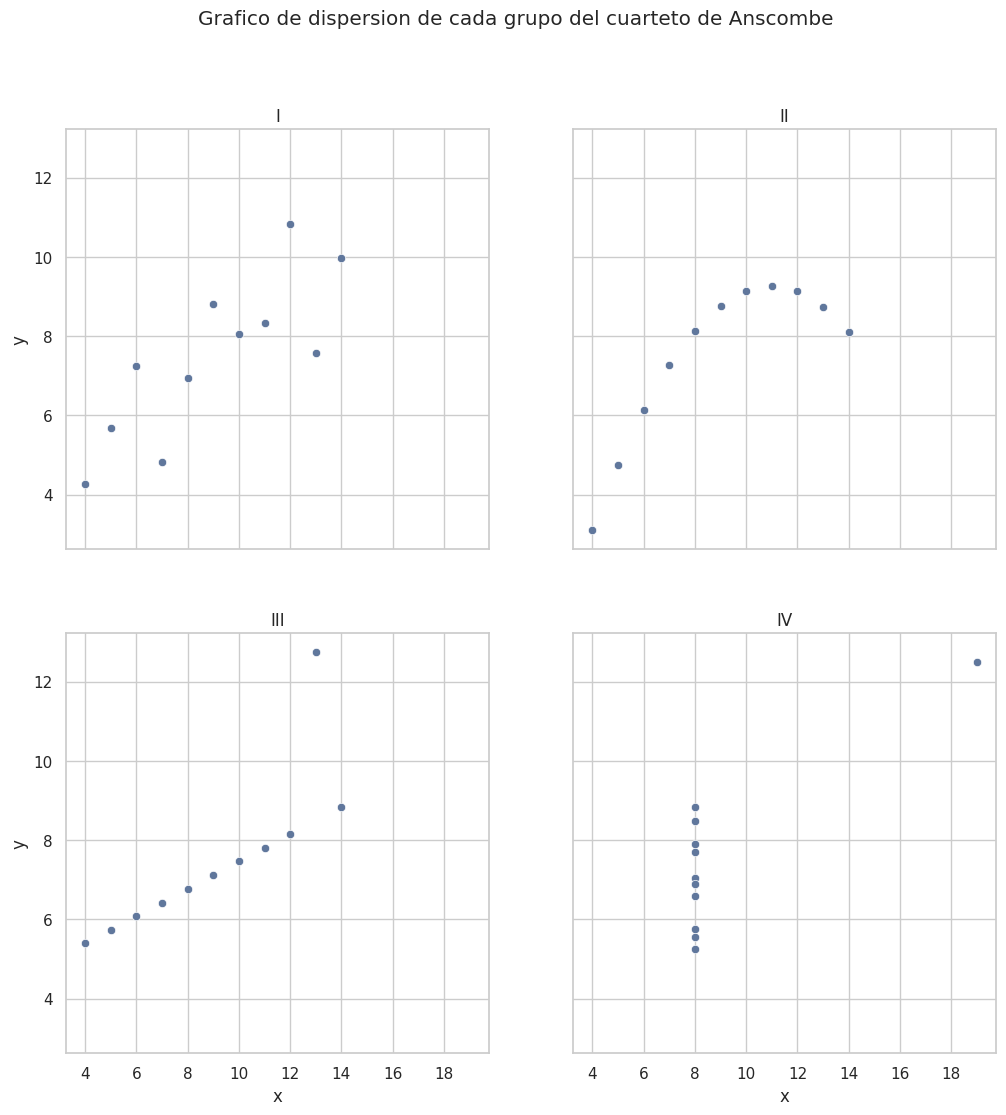

In [120]:
data1=data.loc[data['dataset']=='I'].drop('dataset',axis=1)
data2=data.loc[data['dataset']=='II'].drop('dataset',axis=1)
data3=data.loc[data['dataset']=='III'].drop('dataset',axis=1)
data4=data.loc[data['dataset']=='IV'].drop('dataset',axis=1)

fig, axs = plt.subplots(2, 2,figsize=(12,12),sharex=True,sharey=True)

sns.scatterplot(data=data1,x='x',y='y',ax=axs[0,0])
sns.scatterplot(data=data2,x='x',y='y',ax=axs[0,1])
sns.scatterplot(data=data3,x='x',y='y',ax=axs[1,0])
sns.scatterplot(data=data4,x='x',y='y',ax=axs[1,1])

axs[0,0].set_title('I')
axs[0,1].set_title('II')
axs[1,0].set_title('III')
axs[1,1].set_title('IV')

plt.suptitle('Grafico de dispersion de cada grupo del cuarteto de Anscombe')


Se ven comportamientos bastante distintos para cada uno de los cuatro grupos del cuarteto:

__I__: Dispersión de datos sin comportamiento evidente.

__II__: Comportamiento parabólico de Y en función de X.

__III__: Comportamiento lineal de Y en función de X, salvo uno.

__IV__: Datos con igual valor X=8, salvo uno.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [52]:
desc1=data1.describe().rename(columns={"x": "x_I", "y": "y_I"})
desc2=data2.describe().rename(columns={"x": "x_II", "y": "y_II"})
desc3=data3.describe().rename(columns={"x": "x_III", "y": "y_III"})
desc4=data4.describe().rename(columns={"x": "x_IV", "y": "y_IV"})

describe = pd.concat([desc1,desc2,desc3,desc4], axis=1).loc[:,['x_I','x_II','x_III','x_IV','y_I','y_II','y_III','y_IV']]
describe

,x_I,x_II,x_III,x_IV,y_I,y_II,y_III,y_IV
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


Podemos observar que la cantidad de datos es idéntica entre los cuatro grupos. Además podemos destacar que, para las variables:

__X__: Los grupos I, II y III son idénticos para todo estadístico descrito. Eso sí, el grupo IV es igual solo en media y desviación estandar, pero distinto en las medidas de mínimo, máximo, 25%, 50% y 75%.

__Y__: Todos los grupos exhiben medias y desviaciones estandares idénticas (valores ± 0.001), llegando a ser iguales en ciertos casos. Para el resto de las medidas, cubren un rango de valores mayor pero relativamente cercano.

Para cada grupo, lo que mas se destaca es:

__I__: Ninguna de sus mediciones destaca por sobre o debajo las otras.

__II__: Para sus variables Y, contiene el dato con menor valor y tiene los cuartiles 25%, 50%, 75% más altos.

__III__: Para sus variables Y, contiene el dato con mayor valor y su mínimo grupal es mayor que el mínimo de cualquier otro grupo.

__IV__: Para sus variables X, tiene el dato con mayor valor y sus mediciones de mínimo y cuartiles 25%, 50% y 75% son idénticas.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



In [115]:
d1x,d1y=[data1[['x']],data1['y']]
d2x,d2y=[data2[['x']],data2['y']]
d3x,d3y=[data3[['x']],data3['y']]
d4x,d4y=[data4[['x']],data4['y']]

reg1 = LinearRegression().fit(d1x,d1y)
reg2 = LinearRegression().fit(d2x,d2y)
reg3 = LinearRegression().fit(d3x,d3y)
reg4 = LinearRegression().fit(d4x,d4y)

d1ypred=reg1.predict(d1x)
d2ypred=reg2.predict(d2x)
d3ypred=reg3.predict(d3x)
d4ypred=reg4.predict(d4x)

R1=reg1.score(d1x,d1y)
R2=reg2.score(d2x,d2y)
R3=reg3.score(d3x,d3y)
R4=reg4.score(d4x,d4y)

MSE1=mean_squared_error(d1y, d1ypred)
MSE2=mean_squared_error(d2y, d2ypred)
MSE3=mean_squared_error(d3y, d3ypred)
MSE4=mean_squared_error(d4y, d4ypred)

print('Coeficiente R^2:\nI:',R1,'\nII:',R2,'\nIII:',R3,'\nIV:',R4)
print('\nError Cuadratico Medio:\nI:',MSE1,'\nII:',MSE2,'\nIII:',MSE3,'\nIV:',MSE4)

Coeficiente R^2:
I: 0.6665424595087748 
II: 0.6662420337274844 
III: 0.6663240410665592 
IV: 0.6667072568984653

Error Cuadratico Medio:
I: 1.2511536363636366 
II: 1.2523900826446281 
III: 1.2505628925619836 
IV: 1.249317272727273


Text(0.5, 0.98, 'Grafico de dispersion de cada grupo del cuarteto de Anscombe, con regresiones lineales.')

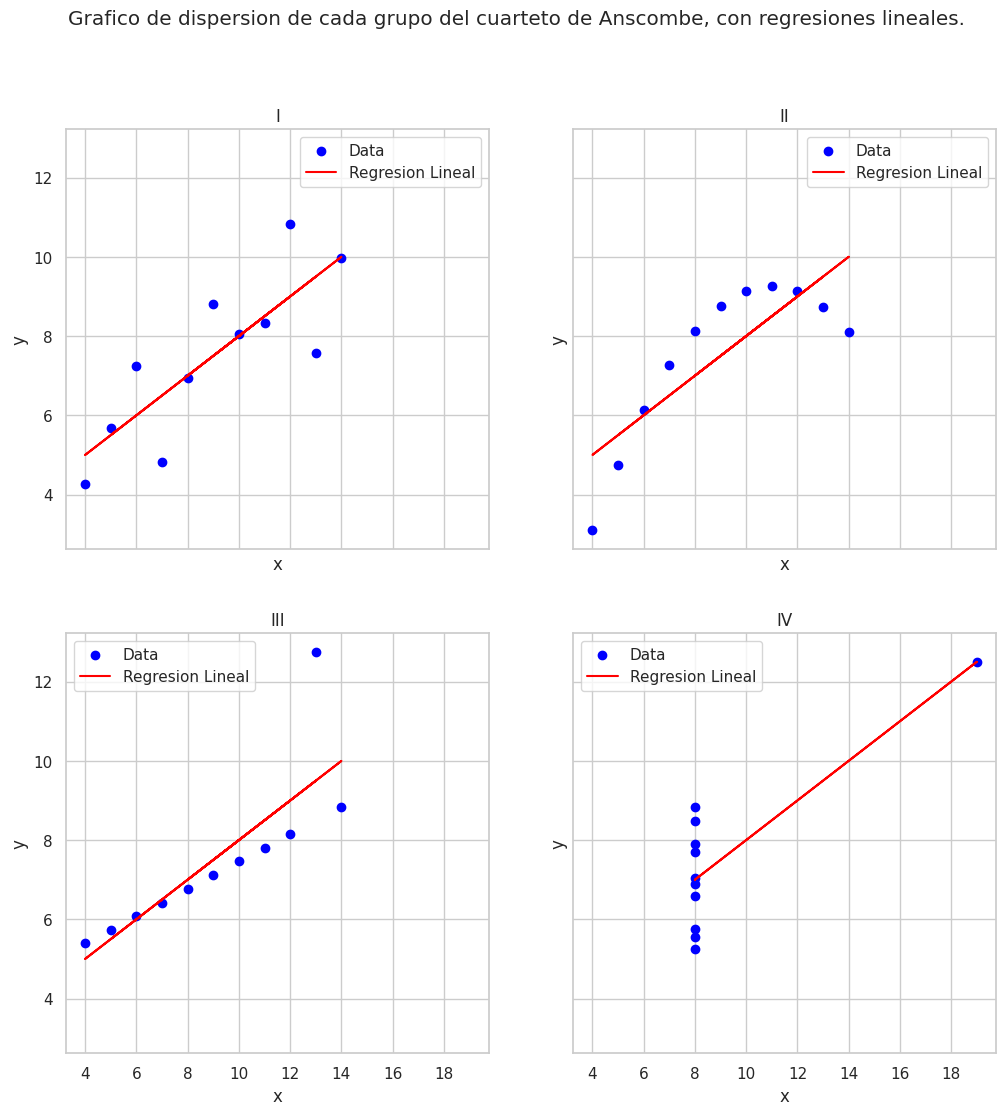

In [133]:
fig, axs = plt.subplots(2, 2,figsize=(12,12),sharex=True,sharey=True)

axs[0,0].scatter(d1x,d1y,color='blue',label='Data')
axs[0,1].scatter(d2x,d2y,color='blue',label='Data')
axs[1,0].scatter(d3x,d3y,color='blue',label='Data')
axs[1,1].scatter(d4x,d4y,color='blue',label='Data')

axs[0,0].plot(d1x,d1ypred,color='red',label='Regresion Lineal')
axs[0,1].plot(d2x,d2ypred,color='red',label='Regresion Lineal')
axs[1,0].plot(d3x,d3ypred,color='red',label='Regresion Lineal')
axs[1,1].plot(d4x,d4ypred,color='red',label='Regresion Lineal')

axs[0,0].set_title('I')
axs[0,1].set_title('II')
axs[1,0].set_title('III')
axs[1,1].set_title('IV')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

axs[0,0].set_xlabel('x')
axs[0,1].set_xlabel('x')
axs[1,0].set_xlabel('x')
axs[1,1].set_xlabel('x')

axs[0,0].set_ylabel('y')
axs[0,1].set_ylabel('y')
axs[1,0].set_ylabel('y')
axs[1,1].set_ylabel('y')

plt.suptitle('Grafico de dispersion de cada grupo del cuarteto de Anscombe, con regresiones lineales.')

Podemos ver que la regresión lineal para cada grupo es idéntica a través de los cuatro grupos, aunque esten distribuidas en distintos rangos de valores. Además, tienen el mismo error cuadrático medio y coeficiente R^2.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Por lo que vemos, es adecuado un ajuste lineal para el grupo I.

Para los grupos III y IV un ajuste lineal también puede ser adecuado. Eso sí, en los grupos III y IV hay exactamente un dato outlier que está fuera del comportamiento lineal, con valor Y mayor que 12. Veamos que ocurre si filtramos fuera de los datos su dato outlier respectivo y vemos su regresión lineal.

In [162]:
data3fix=data3.loc[data['y']<=12]
data4fix=data4.loc[data['y']<=12]

d3xfix,d3yfix=[data3fix[['x']],data3fix['y']]
d4xfix,d4yfix=[data4fix[['x']],data4fix['y']]

reg3fix = LinearRegression().fit(d3xfix,d3yfix)
reg4fix = LinearRegression().fit(d4xfix,d4yfix)

d3yfixpred=reg3fix.predict(d3xfix)
d4yfixpred=reg4fix.predict(d4xfix)

R3fix=reg3fix.score(d3xfix,d3yfix)
R4fix=reg4fix.score(d4xfix,d4yfix)

MSE3fix=mean_squared_error(d3yfix, d3yfixpred)
MSE4fix=mean_squared_error(d4yfix, d4yfixpred)

print('Coeficiente R^2 (sin outlier):\nIII:',R3fix,'\nIV:',R4fix)
print('\nError Cuadratico Medio (sin outlier):\nIII:',MSE3fix,'\nIV:',MSE4fix)


Coeficiente R^2 (sin outlier):
III: 0.999993107581533 
IV: 0.0

Error Cuadratico Medio (sin outlier):
III: 7.597402597401847e-06 
IV: 1.3742490000000003


Text(0.5, 0.98, 'Grafico de dispersion de los grupos III y IV sin outliers, con regresiones lineales.')

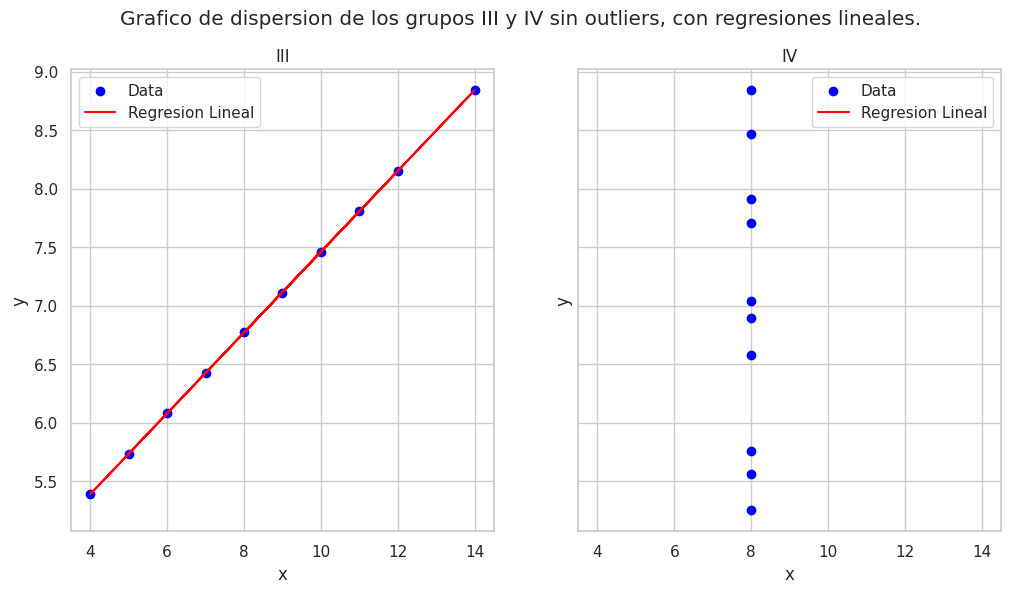

In [163]:
fig, axs = plt.subplots(1, 2,figsize=(12,6),sharex=True,sharey=True)

axs[0].scatter(d3xfix,d3yfix,color='blue',label='Data')
axs[1].scatter(d4xfix,d4yfix,color='blue',label='Data')

axs[0].plot(d3xfix,d3yfixpred,color='red',label='Regresion Lineal')
axs[1].plot(d4xfix,d4yfixpred,color='red',label='Regresion Lineal')

axs[0].set_title('III')
axs[1].set_title('IV')

axs[0].legend()
axs[1].legend()

axs[0].set_xlabel('x')
axs[1].set_xlabel('x')

axs[0].set_ylabel('y')
axs[1].set_ylabel('y')

plt.suptitle('Grafico de dispersion de los grupos III y IV sin outliers, con regresiones lineales.')

Notemos que los datos del grupo III siguen perfectamente un comportamiento lineal. Eso si, podemos ver que el grupo IV tiene problemas con la regresion lineal, puesto que todos sus datos tienen el mismo valor X. Para poder ver su comportamiento, podemos intercambiar los ejes X con Y para poder visualizar este comportamiento.

In [164]:
d4xfixrot,d4yfixrot=[data4fix[['y']],data4fix['x']]
reg4fixrot = LinearRegression().fit(d4xfixrot,d4yfixrot)
d4yfixpredrot=reg4fixrot.predict(d4xfixrot)
R4fixrot=reg4fixrot.score(d4xfixrot,d4yfixrot)
MSE4fixrot=mean_squared_error(d4yfixrot, d4yfixpredrot)

print('Coeficiente R^2 (sin outlier con ejes cambiados):\nIV:',R4fixrot)
print('\nError Cuadratico Medio (sin outlier con ejes cambiados):\nIV:',MSE4fixrot)

Coeficiente R^2 (sin outlier con ejes cambiados):
IV: 1.0

Error Cuadratico Medio (sin outlier con ejes cambiados):
IV: 0.0


Text(0.5, 1.0, 'Grafico de dispersion del grupo IV sin outliers, con regresiones lineales.')

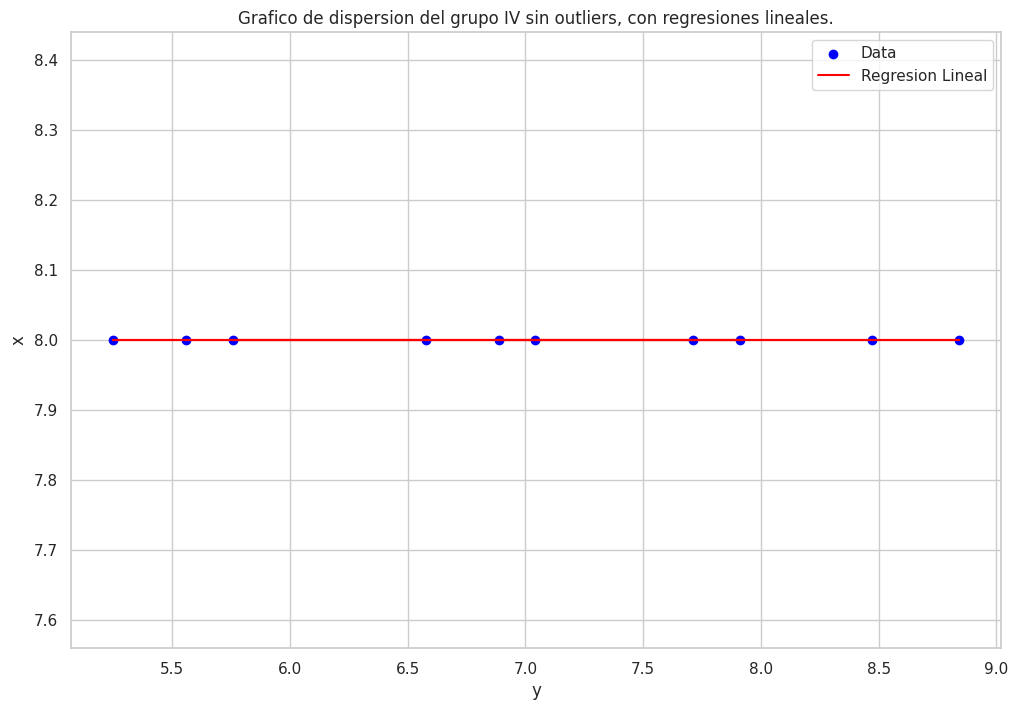

In [242]:
plt.scatter(d4xfixrot,d4yfixrot,color='blue',label='Data')
plt.plot(d4xfixrot,d4yfixpredrot,color='red',label='Regresion Lineal')
plt.legend()
plt.xlabel('y')
plt.ylabel('x')
plt.title('Grafico de dispersion del grupo IV sin outliers, con regresiones lineales.')

Luego, podemos ver claramente que los grupos I, III y IV siguen comportamiento lineal, con los grupos III y IV teniendo comportamiento exactamente lineal al filtrar los outliers. Ahora, basta revisar el grupo II, que al ojo parece tener comportamiento parabólico. Veamos que ocurre si intentamos hacer una regresión polinomial de grado 2.

In [243]:
from sklearn.preprocessing import PolynomialFeatures

d2sort=data2.sort_values(by='x',ascending=True)
d2xsort=d2sort[['x']]
d2ysort=d2sort['y']

qpoly=PolynomialFeatures(degree=2)
d2xqsort=qpoly.fit_transform(d2xsort)
reg2q=LinearRegression().fit(d2xqsort,d2ysort)
d2yqpred=reg2q.predict(d2xqsort)
R2q=reg2q.score(d2xqsort,d2ysort)
MSE2q=mean_squared_error(d2ysort, d2yqpred)

print('Coeficiente R^2 (con regresion cuadratica):\nIV:',R2q)
print('\nError Cuadratico Medio (con regresion cuadratica):\nIV:',MSE2q)


Coeficiente R^2 (con regresion cuadratica):
IV: 0.999999457857722

Error Cuadratico Medio (con regresion cuadratica):
IV: 2.0343293070577633e-06


Text(0.5, 1.0, 'Grafico de dispersion del grupo II, con regresion cuadratica.')

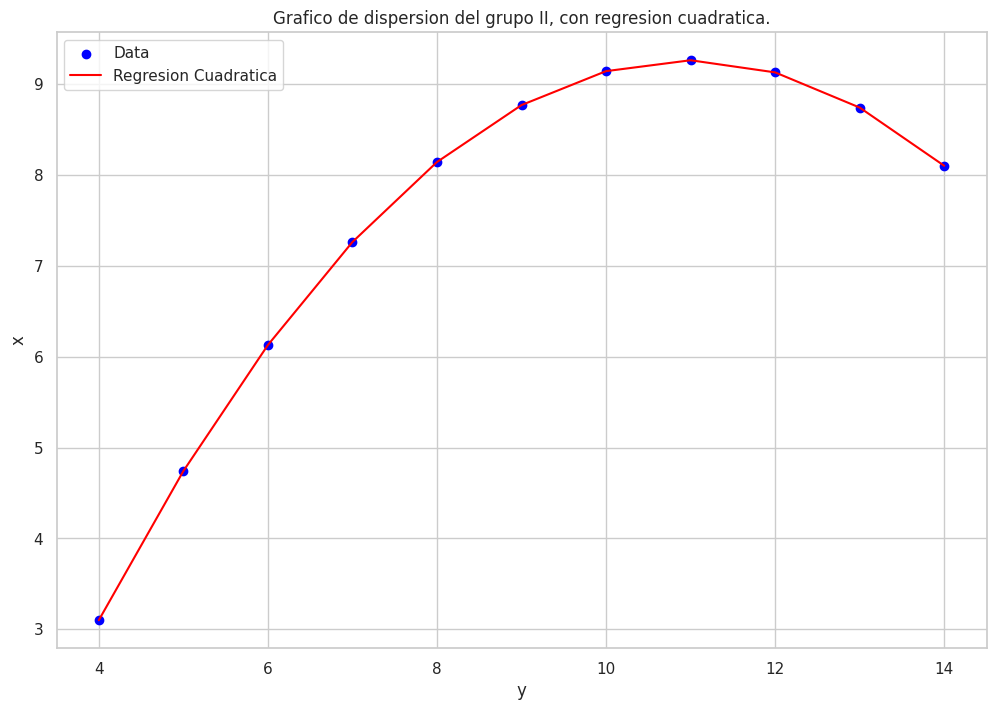

In [246]:
plt.scatter(d2x,d2y,color='blue',label='Data')
plt.plot(d2xsort,d2yqpred,color='red',label='Regresion Cuadratica')
plt.legend()
plt.xlabel('y')
plt.ylabel('x')
plt.title('Grafico de dispersion del grupo II, con regresion cuadratica.')

Asi, se puede ver claramente como el grupo II tiene comportamiento polinomial cuadratico exacto.